In [1]:
from PythonTsa.datadir import getdtapath
import pandas as pd
import numpy as np
from numpy.random import normal
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
dtapath=getdtapath()

In [3]:
import os
dtapath = getdtapath()
arquivos = os.listdir(dtapath)
for arquivo in arquivos:
    print(arquivo)

AntidiabeticDrugSales.csv
areturns.csv
AustraliaEmployedTotalPersons.xlsx
AustraliaUnemployedTotalPersons.xlsx
BitcoinPrice17-6-23-18-6-22.xlsx
chaos.csv
DAX.csv
DAXlogret.csv
dlGDPukcaus1q1980.csv
EconGermany.dat
elec-temp.csv
ExchRate NZ per UK.txt
gdpquarterlychina1992.1-2017.4.csv
Global mean surface air temp changes 1880-1985.csv
GlobalTemperature.txt
h02July1991June2008.csv
IBM.csv
ibmlogret.csv
milk.xlsx
monthly returns of PG stock 1961 to 2016.csv
monthly returns of Procter n Gamble stock n 3 market indexes 1961 to 2016.csv
nao.csv
Noboyngirl.csv
realGdpConsInv.csv
RwalkwDrift0.3.csv
Southtemperature.txt
SP500dailyreturns.csv
us-q-rgdp.csv
USbill.csv
USEconomicChange.csv
USFemalesAged20+Job1948-81.csv
usFOI.csv
usGDPnotAdjust.csv
USmacronInRate.txt
USQgdpunemp.csv
WTI-Brent.csv
Yearly mean total sunspot number 1700 - 2017.csv


# 6.1

In [4]:
from PythonTsa.LjungBoxtest import plot_LB_pvalue

In [6]:
dax =pd.read_csv(dtapath + 'DAX.csv', header = 0)
dax.rename(columns = {'Adj Close': 'index'}, inplace = True)

In [7]:
dax['logreturn'] = np.log(dax['index']/dax['index'].shift(1))

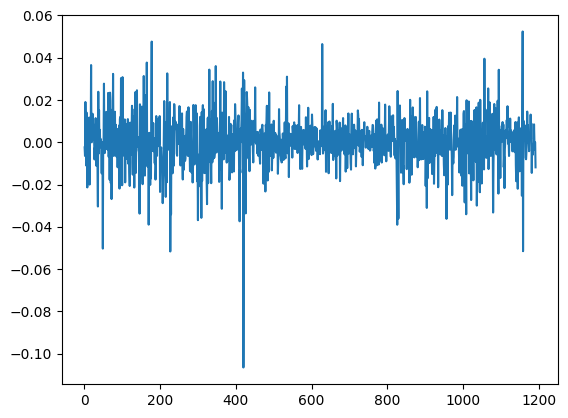

In [9]:
logret = dax['logreturn']
plt.plot(logret)

In [24]:
sm.tsa.kpss(logret)

C:\Users\guilh\AppData\Local\Temp\ipykernel_93492\681235086.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  sm.tsa.kpss(logret)


(0.0813791232864188,
 0.1,
 13,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [17]:
logret.index = dax['Date']
logret = logret.dropna()

In [18]:
from PythonTsa.ModResidDiag import plot_ResidDiag

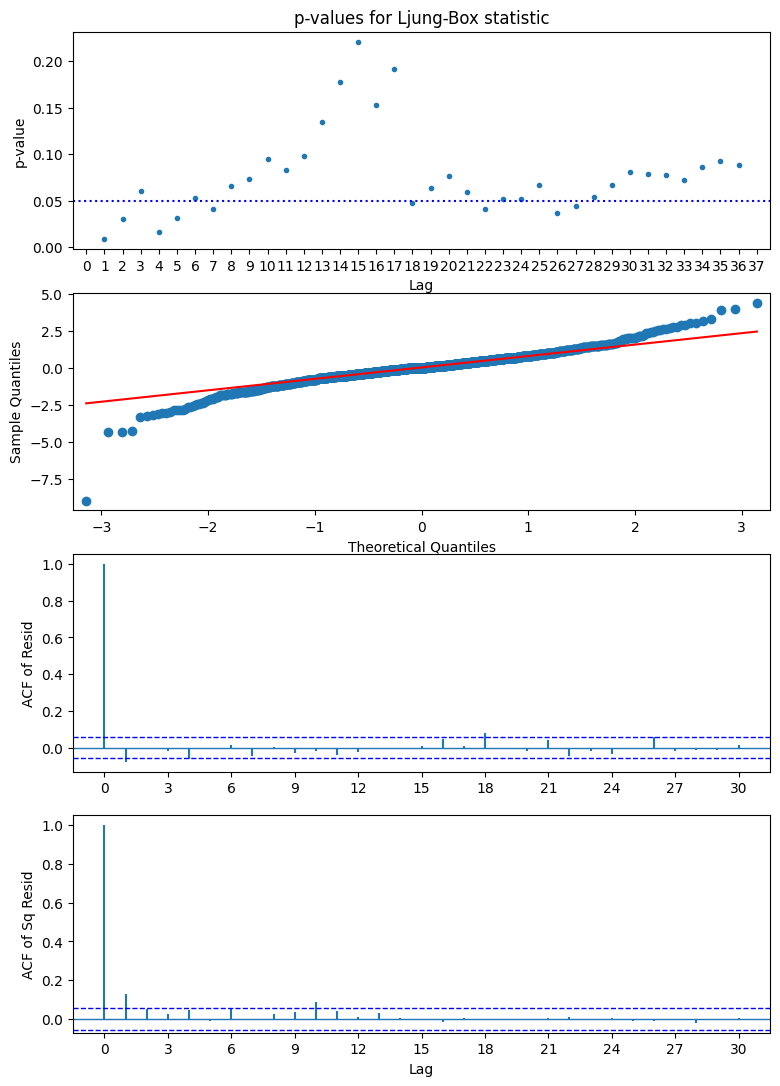

In [22]:
plot_ResidDiag(logret, noestimatedcoef = 0, nolags = 36)

In [23]:
#parece ter alguma autocorrelação, tanto na SÉRIE, quanto na VOLATILIDADE

In [383]:
from scipy.stats import norm
from scipy.stats import t

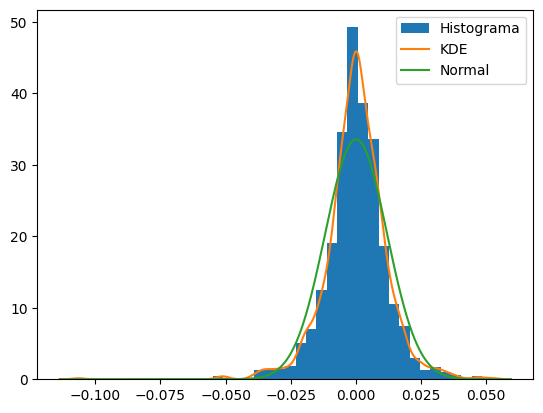

In [69]:
fig = plt.figure()
plt.hist(logret, bins = 40, density=True, label = 'Histograma')
kde = sm.nonparametric.KDEUnivariate(logret)
kde.fit()
plt.plot(kde.support, kde.density, label = 'KDE')
normdem = norm.pdf(kde.support,loc=np.mean(logret), scale = np.std(logret, ddof=1))
plt.plot(kde.support, normdem, label = 'Normal')
plt.legend()
plt.show()

In [70]:
#podemos ver que é mais centrada na média que a normal e tem caudas mais longas.

# 6.3

In [71]:
#monta GARCH(2,1), com n=1000 e analise os dados com o exemplo 6.3

In [135]:
from PythonTsa.plot_acf_pacf import acf_pacf_fig

In [72]:
from arch.univariate import arch_model

In [214]:
sim_mod = arch_model(None, p=2, q=1)
params = [0,0.1, 0.2, 0.1, 0.6] #[r,omega, alpha, beta]
sim_data = sim_mod.simulate(params, nobs=1000)

In [215]:
sim_data.head()

,data,volatility,errors
0,0.144140,0.826711,0.144140
1,0.086591,0.745146,0.086591
2,-0.069443,0.660850,-0.069443
3,-0.306019,0.603115,-0.306019
4,-0.585279,0.580913,-0.585279


<Axes: >

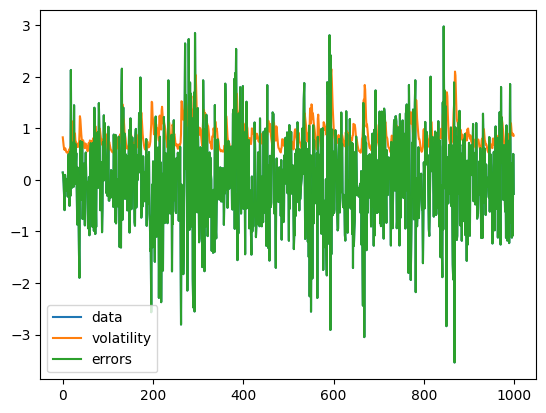

In [216]:
sim_data.plot()

In [217]:
sm.tsa.kpss(sim_data['data'])

C:\Users\guilh\AppData\Local\Temp\ipykernel_93492\2829464601.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  sm.tsa.kpss(sim_data['data'])


(0.04423854853136632,
 0.1,
 6,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

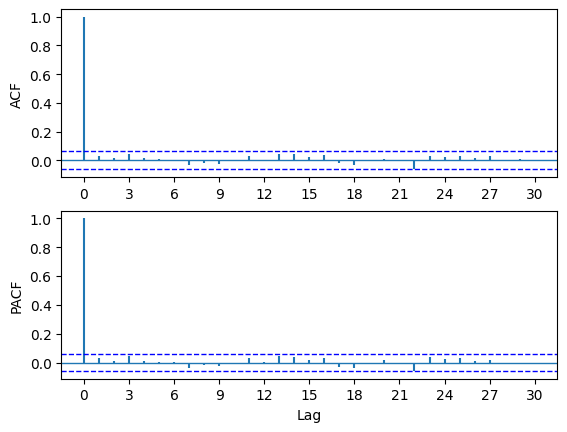

In [218]:
acf_pacf_fig(sim_data['data'], both = True)

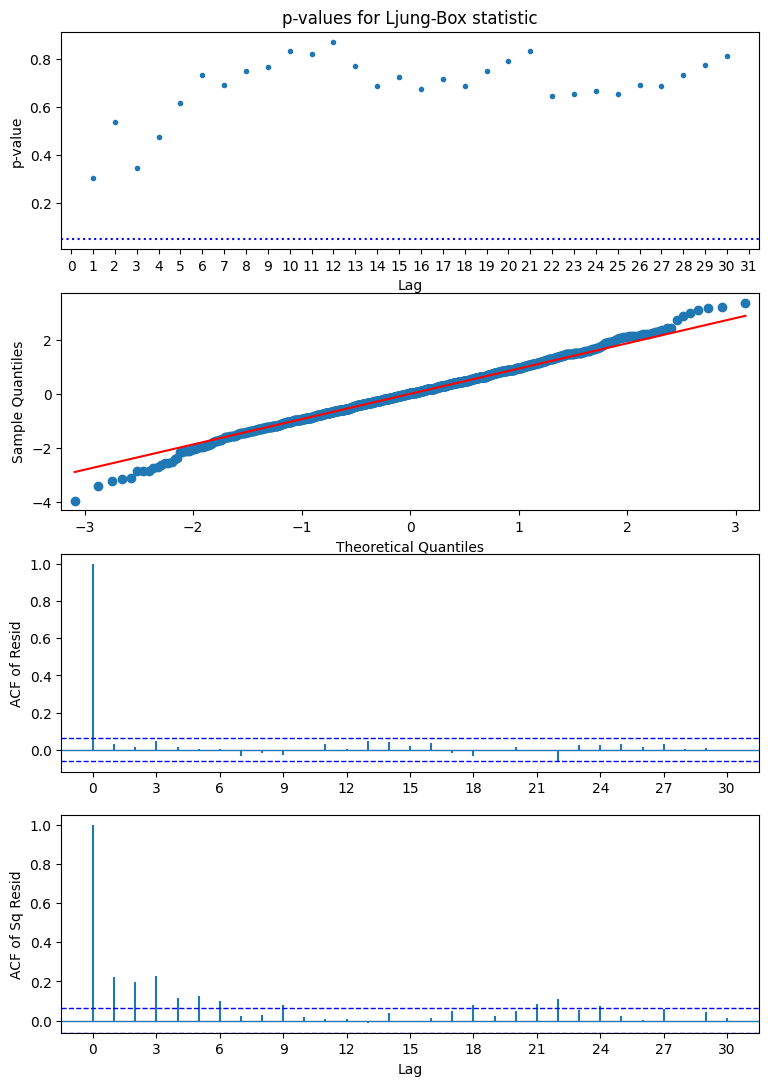

In [219]:
plot_ResidDiag(sim_data['data'], noestimatedcoef=0 , nolags = 30  )

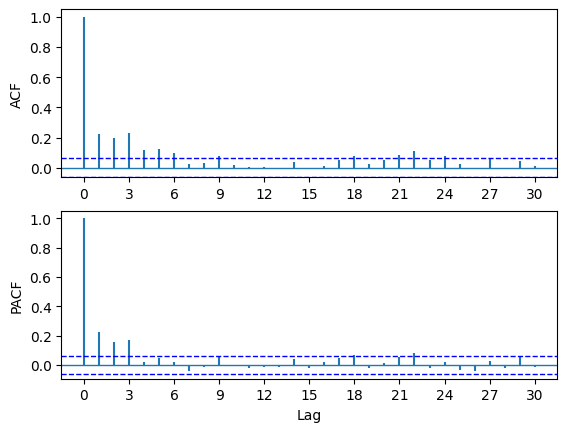

In [220]:
acf_pacf_fig(sim_data['data']**2, both=True)

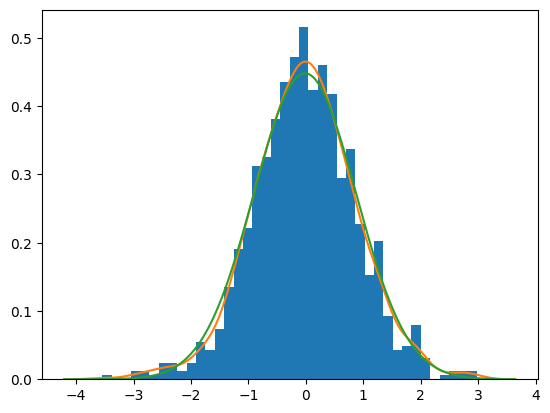

In [222]:
data = sim_data['data']
fig = plt.figure()
ax = fig.add_subplot(111)
hfig = ax.hist(data, bins = 40, density= True, label = 'Histogram')
kde = sm.nonparametric.KDEUnivariate(data)
kde.fit()
ax.plot(kde.support, kde.density, label = 'KDE')
smean = np.mean(data)
scal = np.std(data)
normdem = norm.pdf(kde.support, loc=smean,scale=scal)
ax.plot(kde.support, normdem, label = 'Densidade Normal')

In [223]:
#vamos montar o Garch
garchmod = arch_model(data, p=2, q=1).fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3882.6562455337717
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4030.77739482118
Iteration:      3,   Func. Count:     26,   Neg. LLF: 1518.7327142147378
Iteration:      4,   Func. Count:     33,   Neg. LLF: 1300.1320438387415
Iteration:      5,   Func. Count:     41,   Neg. LLF: 1258.4473382867336
Iteration:      6,   Func. Count:     48,   Neg. LLF: 1247.5138372470042
Iteration:      7,   Func. Count:     55,   Neg. LLF: 1253.6988526036725
Iteration:      8,   Func. Count:     62,   Neg. LLF: 1247.1020574326553
Iteration:      9,   Func. Count:     68,   Neg. LLF: 1247.1017613096406
Iteration:     10,   Func. Count:     74,   Neg. LLF: 1247.1017599593258
Iteration:     11,   Func. Count:     79,   Neg. LLF: 1247.1017599597128
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1247.1017599593258
            Iterations: 11
            Function evaluations: 79
            Gradient evalu

In [224]:
garchmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   data   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1247.10
Distribution:                  Normal   AIC:                           2504.20
Method:            Maximum Likelihood   BIC:                           2528.74
                                        No. Observations:                 1000
Date:                Sun, Aug 04 2024   Df Residuals:                      999
Time:                        17:42:31   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            -0.0133  2.426e-02     -0.547      0.584 [-6.081e-02,3.426e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1381  3.227e-02      4.281  1.863e-05  [7.489e-02,  0.201]
alpha[1]       0.2157  5.223e-02      4.130  3.620e-05    [  0.113,  0.318]
alpha[2]       0.0529  6.240e-02      0.848      0.396 [-6.937e-02,  0.175]
beta[1]        0.5651  6.720e-02      8.409  4.135e-17    [  0.433,  0.697]
===========================================================================

Covariance estimator: robust
"""

<Axes: >

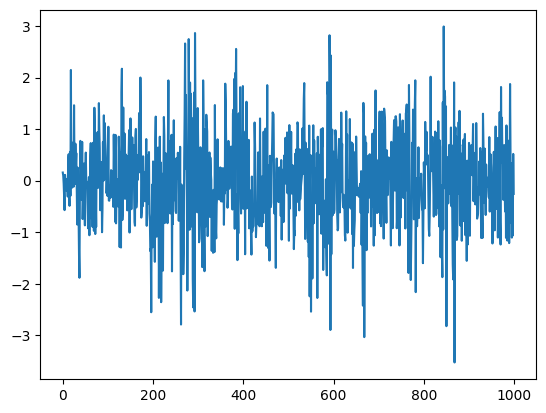

In [230]:
garchmod.resid.plot()

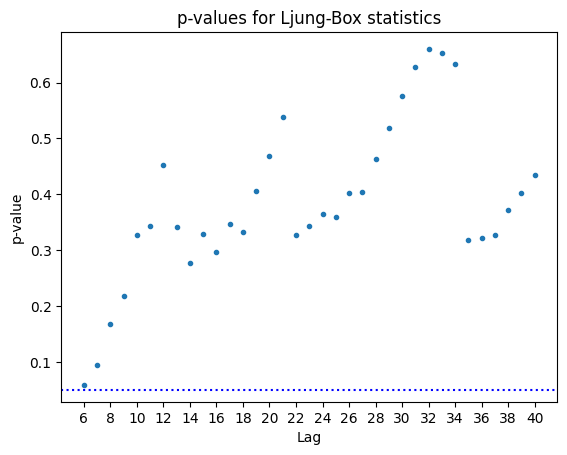

In [226]:
plot_LB_pvalue(garchmod.resid, noestimatedcoef = 5, nolags = 40)

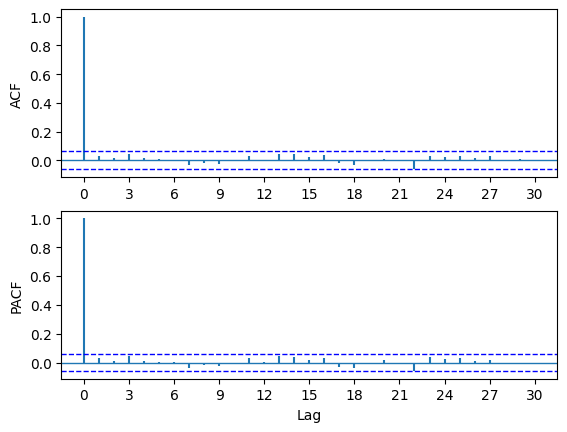

In [229]:
acf_pacf_fig(garchmod.resid, both =True)

In [231]:
from statsmodels.graphics.api import qqplot

[]

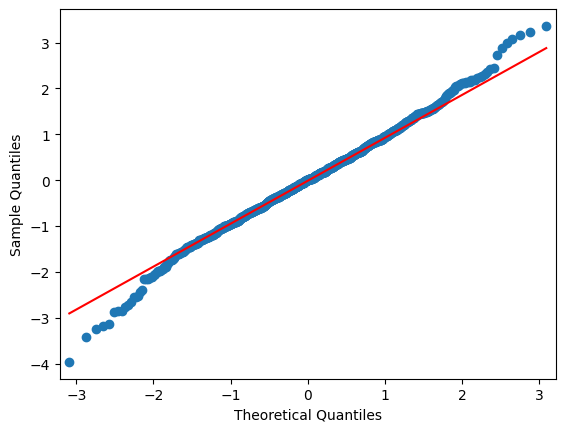

In [232]:
qqplot(garchmod.resid, line='q', fit = True)
plt.plot()

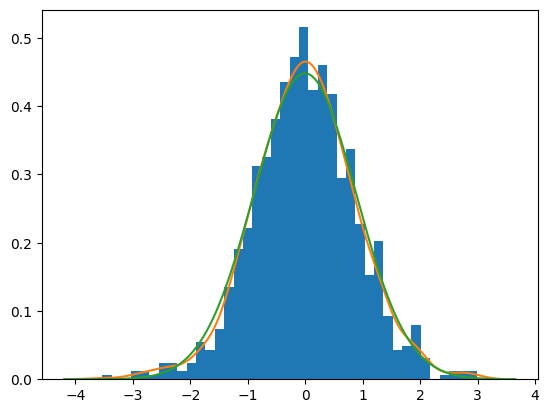

In [233]:
data = garchmod.resid
fig = plt.figure()
ax = fig.add_subplot(111)
hfig = ax.hist(data, bins = 40, density= True, label = 'Histogram')
kde = sm.nonparametric.KDEUnivariate(data)
kde.fit()
ax.plot(kde.support, kde.density, label = 'KDE')
smean = np.mean(data)
scal = np.std(data)
normdem = norm.pdf(kde.support, loc=smean,scale=scal)
ax.plot(kde.support, normdem, label = 'Densidade Normal')

# 6.5
south temp modelar completamente a serie,

In [234]:
import math

In [235]:
temp = pd.read_csv(dtapath + 'Southtemperature.txt', header = None, sep='\s+')
temp

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.625,-0.598,-0.841,-0.632,-0.326,-0.528,-0.296,-0.503,-0.602,-0.420,-0.234,-0.358
1,-0.461,-0.326,-0.368,-0.555,-0.494,-0.417,-0.309,-0.228,-0.419,-0.282,-0.155,-0.253
2,-0.854,-0.689,-0.619,-0.638,-0.412,-0.354,0.007,-0.468,-0.339,-0.411,-0.247,-0.241
3,-0.600,-0.706,-0.420,-0.475,-0.494,-0.456,-0.204,-0.266,-0.519,-0.493,-0.254,-0.503
4,-0.488,-0.458,-0.594,-0.530,-0.582,-0.379,-0.605,-0.597,-0.220,-0.463,-0.454,-0.666
...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.438,0.467,0.436,0.401,0.351,0.434,0.371,0.346,0.348,0.355,0.362,0.309
154,0.359,0.392,0.340,0.388,0.232,0.260,0.239,0.284,0.295,0.354,0.275,0.282
155,0.330,0.381,0.418,0.405,0.347,0.356,0.351,0.368,0.259,0.328,0.260,0.255
156,0.326,0.368,0.323,0.299,0.232,0.267,0.324,0.330,0.214,0.241,0.228,0.303


In [236]:
temts = pd.concat([temp.loc[0], temp.loc[1]] ,ignore_index='true')

In [237]:
for i in range(2,158):
    temts=pd.concat([temts,temp.loc[i]],ignore_index = 'true')
type(temts)

pandas.core.series.Series

In [238]:
dates=pd.date_range('1850', periods = len(temts), freq ='M')
temts.index=dates

In [239]:
temp = temts['1970-01':'2007-12']
cos = np.zeros((len(temp), 6))
sin = np.zeros((len(temp), 6))
tim = np.zeros(len(temp))

In [240]:
for i in range(36):
    for j  in range(12):
        tim[i*12+j] = 1850.0+i+j/12.0
pi = math.pi
for i in range(6):
    cos[:,i] = np.cos(2 * pi* (i+1) *tim)
    sin[:,i] = np.sin(2 * pi* (i+1) *tim)
    
TIME = (tim - np.mean(tim))/ np.sqrt(np.var(tim))
np.mean(tim)

1769.6447368421052

In [242]:
x1 = np.column_stack((TIME,TIME**2))
x1 = sm.add_constant(x1)
olsmodel1 = sm.OLS(temp, x1).fit()
olsmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     274.4
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           8.34e-79
Time:                        18:33:02   Log-Likelihood:                 305.85
No. Observations:                 456   AIC:                            -605.7
Df Residuals:                     453   BIC:                            -593.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1060      0.054    -20.523      0.000      -1.212      -1.000
x1             4.8944      0.215     22.813      0.000       4.473       5.316
x2             1.2295      0.054     22.949      0.000       1.124       1.335
==============================================================================
Omnibus:                       30.928   Durbin-Watson:                   0.388
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.903
Skew:                           0.433   Prob(JB):                     7.26e-13
Kurtosis:                       4.480   Cond. No.                         166.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

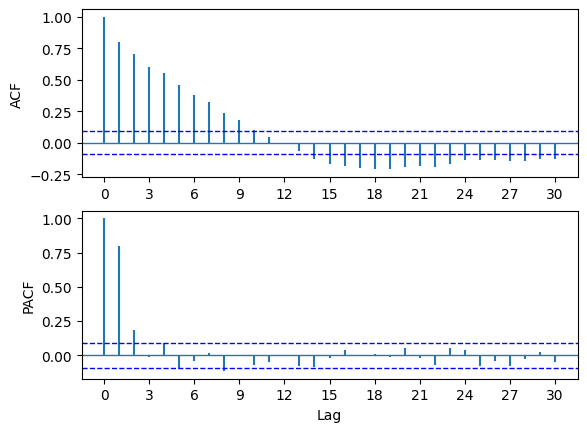

In [243]:
acf_pacf_fig(olsmodel1.resid, both= True)

In [295]:
model3 = sm.tsa.SARIMAX(temp, order=(2,0,0),seasonal_order = (1,0,0,4), exog = x1).fit(disp = False)#, seasonal_order = (2,1,1,12)).fit(disp=False)
model3.summary()

C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  456
Model:             SARIMAX(2, 0, 0)x(1, 0, 0, 4)   Log Likelihood                 556.215
Date:                           Sun, 04 Aug 2024   AIC                          -1098.431
Time:                                   18:45:17   BIC                          -1069.573
Sample:                               01-31-1970   HQIC                         -1087.063
                                    - 12-31-2007                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9974      0.192     -5.187      0.000      -1.374      -0.620
x1             4.4497      0.771      5.770      0.000       2.938       5.961
x2             1.1229      0.194      5.795      0.000       0.743       1.503
ar.L1          0.6709      0.043     15.543      0.000       0.586       0.756
ar.L2          0.1669      0.047      3.556      0.000       0.075       0.259
ar.S.L4        0.1270      0.058      2.191      0.028       0.013       0.241
sigma2         0.0051      0.000     16.132      0.000       0.004       0.006
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 2.42
Prob(Q):                              0.87   Prob(JB):                         0.30
Heteroskedasticity (H):               0.85   Skew:                             0.03
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

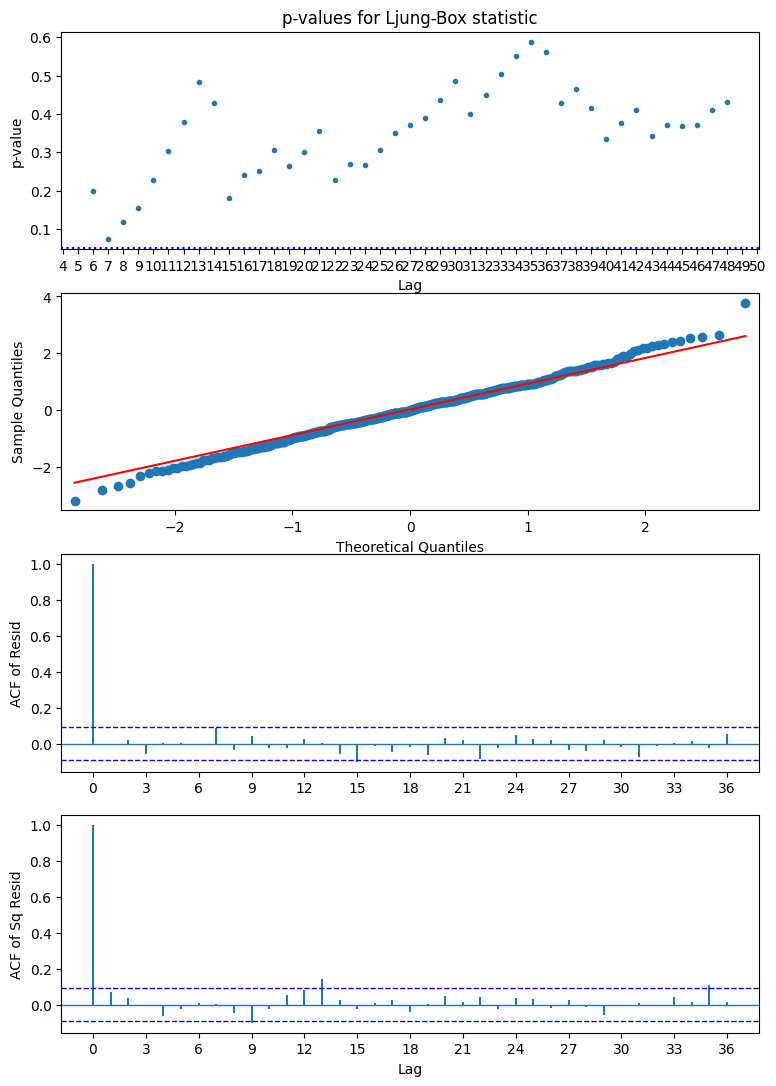

In [296]:
plot_ResidDiag(model3.resid, noestimatedcoef=5, nolags=48, lag=36)

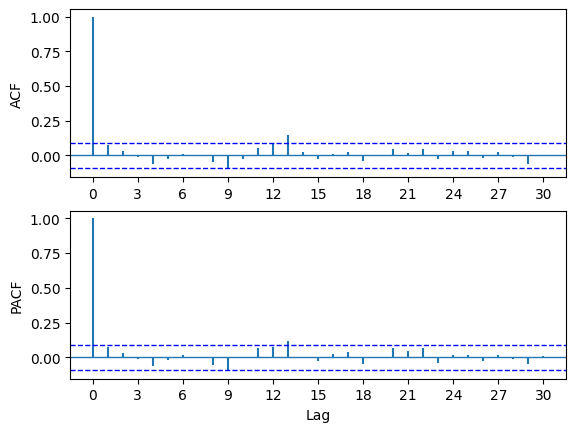

In [297]:
acf_pacf_fig(model3.resid**2, both= True)

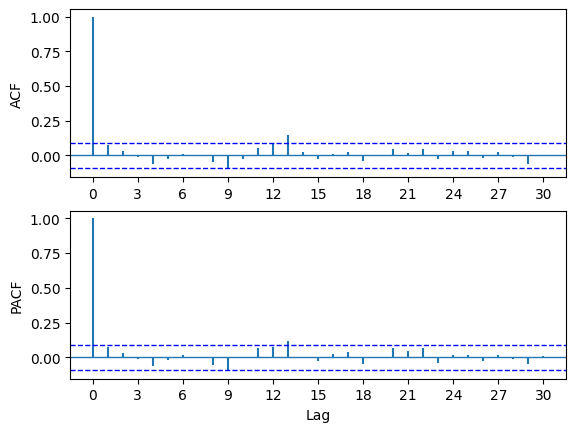

In [298]:
acf_pacf_fig(model3.resid**2, both = True)

In [299]:
garchmod1 = arch_model(model3.resid, p=1, o=0, q=0, mean = 'zero').fit()
garchmod1.summary()

Iteration:      1,   Func. Count:      4,   Neg. LLF: -246.48864669974068
Iteration:      2,   Func. Count:     10,   Neg. LLF: -552.1891823293714
Iteration:      3,   Func. Count:     13,   Neg. LLF: 385800.43935241236
Iteration:      4,   Func. Count:     17,   Neg. LLF: -553.2487148877731
Iteration:      5,   Func. Count:     21,   Neg. LLF: -555.9332134689334
Iteration:      6,   Func. Count:     25,   Neg. LLF: -556.1494680455645
Iteration:      7,   Func. Count:     28,   Neg. LLF: -556.1494697189071
Iteration:      8,   Func. Count:     30,   Neg. LLF: -556.1494697189135
Optimization terminated successfully    (Exit mode 0)
            Current function value: -556.1494697189071
            Iterations: 8
            Function evaluations: 30
            Gradient evaluations: 8


C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.005135. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Zero Mean - ARCH Model Results                        
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.002
Vol Model:                       ARCH   Log-Likelihood:                556.149
Distribution:                  Normal   AIC:                          -1108.30
Method:            Maximum Likelihood   BIC:                          -1100.05
                                        No. Observations:                  456
Date:                Sun, Aug 04 2024   Df Residuals:                      456
Time:                        18:45:19   Df Model:                            0
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      4.7411e-03  4.224e-04     11.223  3.143e-29 [3.913e-03,5.569e-03]
alpha[1]       0.0774  6.866e-02      1.127      0.260  [-5.720e-02,  0.212]
============================================================================

Covariance estimator: robust
"""

# 6.7

In [308]:
ret_dax = dax['index']/dax['index'].shift(1)
ret_dax = ret_dax.dropna()

C:\Users\guilh\AppData\Local\Temp\ipykernel_93492\7001913.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  sm.tsa.kpss(ret_dax)


(0.08122090939497185,
 0.1,
 13,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

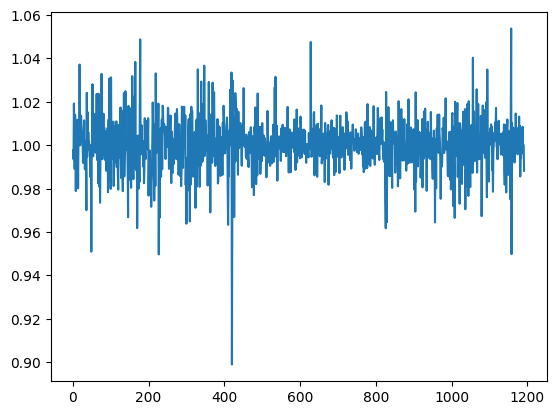

In [317]:
ret_dax.plot()
sm.tsa.kpss(ret_dax)

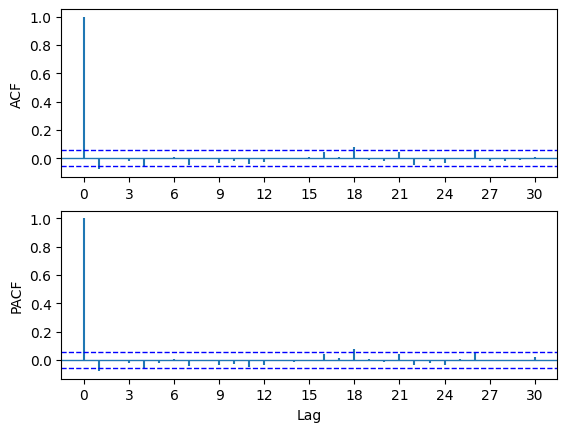

In [310]:
acf_pacf_fig(ret_dax, both = True)

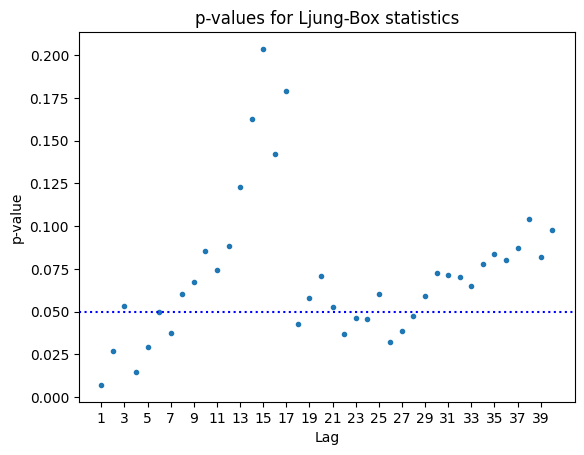

In [311]:
plot_LB_pvalue(ret_dax, noestimatedcoef = 0, nolags = 40)

<Axes: xlabel='Date'>

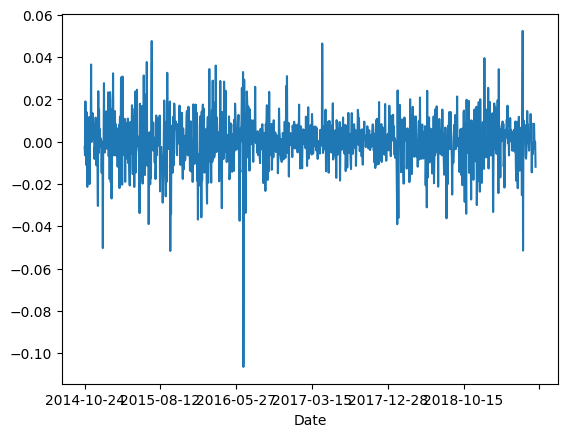

In [313]:
logret.plot()

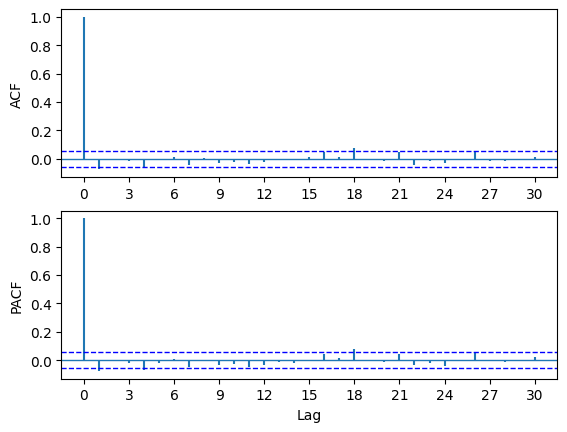

In [314]:
acf_pacf_fig(logret, both = True)

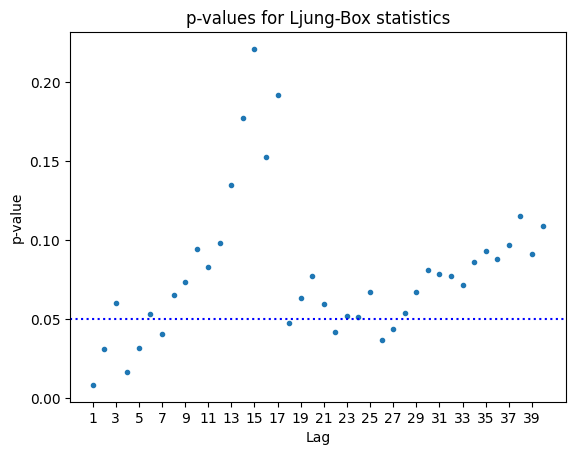

In [315]:
plot_LB_pvalue(logret, noestimatedcoef = 0, nolags = 40)

In [316]:
sm.tsa.kpss(logret)

C:\Users\guilh\AppData\Local\Temp\ipykernel_93492\681235086.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  sm.tsa.kpss(logret)


(0.0813791232864188,
 0.1,
 13,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

# 6.8
exemplo 6.5 vamos sub iidN(0,1) por iidT(0,1) e "refitar" o GARCH(2,2) na serie xresid, o modelo melhora?

In [319]:
ret= pd.read_csv(dtapath + 'SP500dailyreturns.csv', header = None)

<Axes: >

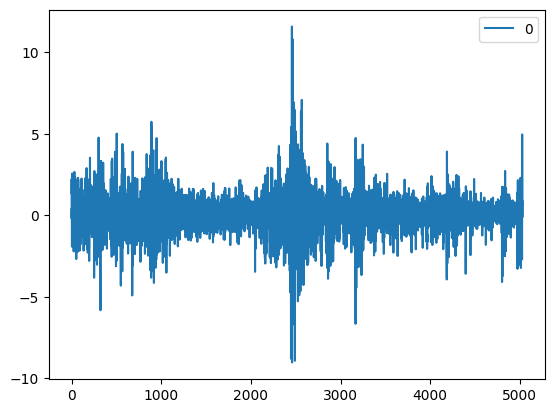

In [320]:
ret.plot()

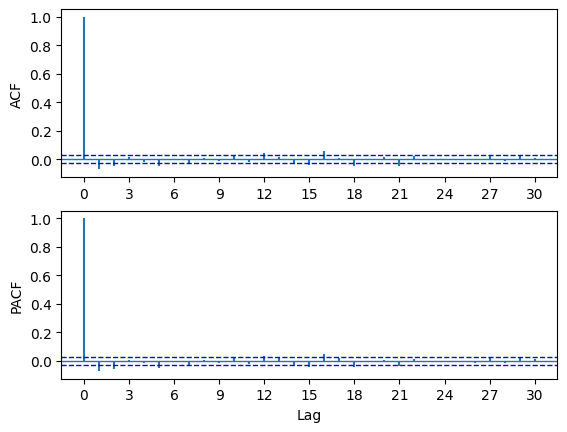

In [322]:
acf_pacf_fig(ret, both=True)

In [330]:
modelsp500 = sm.tsa.SARIMAX(ret, order=((1,2,3,4,5,6,7,9,11,12,13,15),0,2),
                            seasonal_order = (0,0,0,0)).fit(disp = False)
modelsp500.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                  SARIMAX Results                                                  
===================================================================================================================
Dep. Variable:                                                           0   No. Observations:                 5030
Model:             SARIMAX([1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 15], 0, 2)   Log Likelihood               -8011.944
Date:                                                     Sun, 04 Aug 2024   AIC                          16053.888
Time:                                                             19:08:14   BIC                          16151.736
Sample:                                                                  0   HQIC                         16088.172
                                                                    - 5030                                         
Covariance Type:                                                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5797      0.050    -11.513      0.000      -0.678      -0.481
ar.L2         -0.7495      0.053    -14.270      0.000      -0.852      -0.647
ar.L3         -0.0728      0.012     -6.058      0.000      -0.096      -0.049
ar.L4         -0.0580      0.011     -5.305      0.000      -0.079      -0.037
ar.L5         -0.0574      0.010     -5.589      0.000      -0.078      -0.037
ar.L6         -0.0378      0.010     -3.846      0.000      -0.057      -0.019
ar.L7         -0.0542      0.010     -5.590      0.000      -0.073      -0.035
ar.L9         -0.0319      0.008     -3.752      0.000      -0.049      -0.015
ar.L11        -0.0302      0.010     -3.086      0.002      -0.049      -0.011
ar.L12         0.0335      0.010      3.454      0.001       0.014       0.052
ar.L13         0.0209      0.010      2.151      0.031       0.002       0.040
ar.L15        -0.0537      0.008     -6.504      0.000      -0.070      -0.038
ma.L1          0.5073      0.050     10.231      0.000       0.410       0.604
ma.L2          0.6631      0.052     12.770      0.000       0.561       0.765
sigma2         1.4159      0.014     97.777      0.000       1.387       1.444
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10524.97
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [331]:
xresid = modelsp500.resid

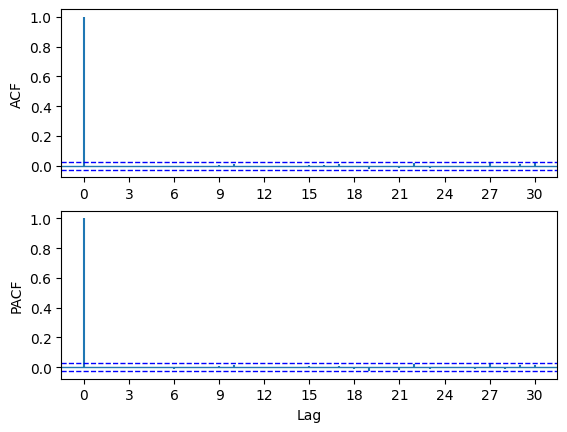

In [332]:
acf_pacf_fig(xresid, both = True)

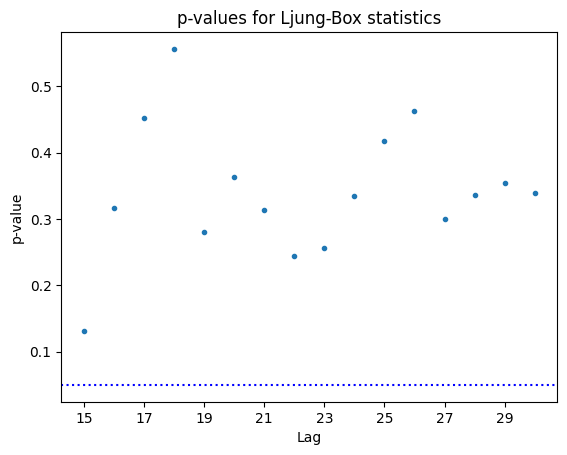

In [334]:
plot_LB_pvalue(xresid, noestimatedcoef = 14, nolags = 30)

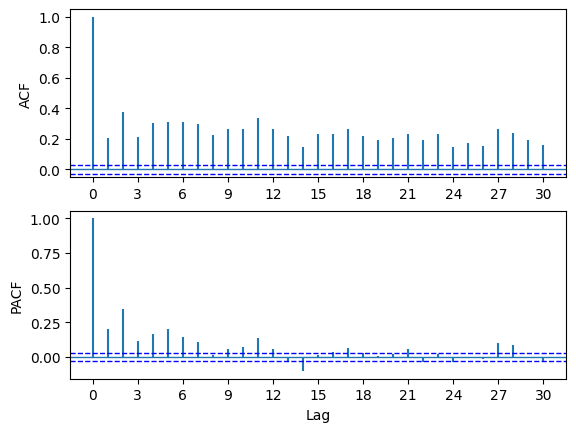

In [335]:
acf_pacf_fig(xresid**2, both = True)

In [347]:
garch_sp500 = arch_model(xresid, p=2, q=2, mean = 'Zero', dist = 'StudentsT').fit(disp='off')
garch_sp500.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Zero Mean - GARCH Model Results                           
====================================================================================
Dep. Variable:                         None   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -6845.91
Distribution:      Standardized Student's t   AIC:                           13703.8
Method:                  Maximum Likelihood   BIC:                           13743.0
                                              No. Observations:                 5030
Date:                      Sun, Aug 04 2024   Df Residuals:                     5030
Time:                              19:14:07   Df Model:                            0
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0154  4.878e-03      3.155  1.605e-03 [5.829e-03,2.495e-02]
alpha[1]       0.0341  1.556e-02      2.195  2.815e-02 [3.660e-03,6.464e-02]
alpha[2]       0.1109  2.697e-02      4.110  3.952e-05   [5.800e-02,  0.164]
beta[1]        0.5498      0.283      1.942  5.208e-02  [-4.956e-03,  1.105]
beta[2]        0.3009      0.264      1.142      0.254     [ -0.216,  0.818]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             6.9383      0.707      9.810  1.017e-22 [  5.552,  8.325]
========================================================================

Covariance estimator: robust
"""

In [353]:
garchres = garch_sp500.std_resid

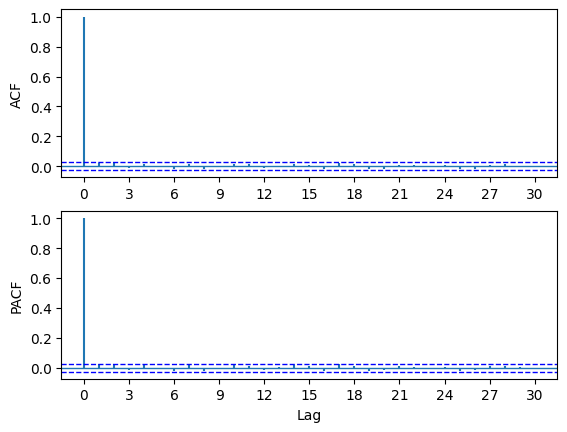

In [359]:
acf_pacf_fig(garchres, both = True)

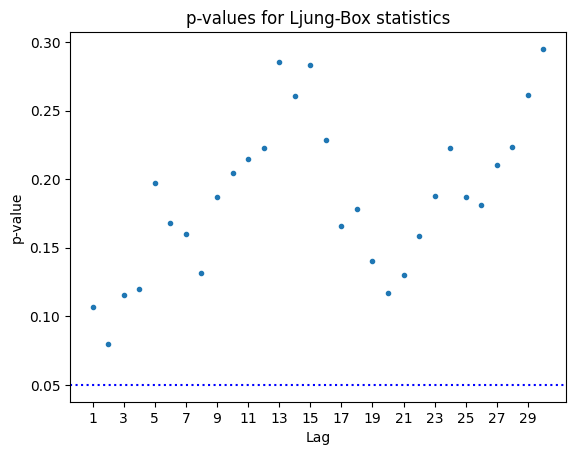

In [360]:
plot_LB_pvalue(garchres, noestimatedcoef = 0, nolags = 30)

In [366]:
from scipy import stats

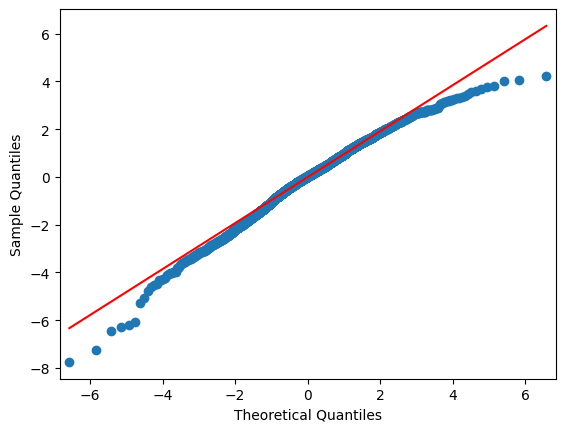

In [379]:
qqplot(garchres, stats.t, line = 'q', distargs = (6.93,) ,fit = True)
plt.show()

# 6.9

<Axes: >

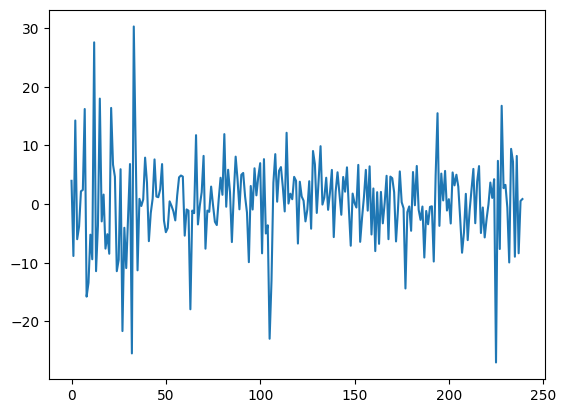

In [392]:
ibm = pd.read_csv(dtapath + 'ibmlogret.csv', header = 0)
logibm = ibm['logreturn']
logibm.plot()

In [394]:
from PythonTsa.Selecting_arma import choose_arma

In [401]:
model_ibm = sm.tsa.SARIMAX(logibm, order = (0,0,1)).fit(trend = 'nc')
model_ibm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              logreturn   No. Observations:                  240
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -811.524
Date:                Sun, 04 Aug 2024   AIC                           1627.047
Time:                        19:32:17   BIC                           1634.009
Sample:                             0   HQIC                          1629.852
                                - 240                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1555      0.049     -3.190      0.001      -0.251      -0.060
sigma2        50.6396      3.292     15.383      0.000      44.187      57.092
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                66.38
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [402]:
armaresid = model_ibm.resid

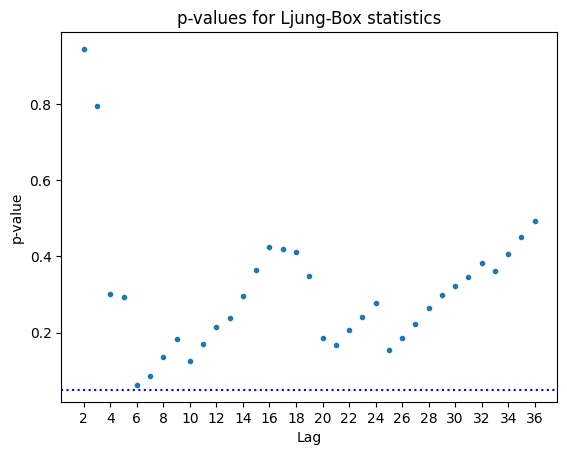

In [406]:
plot_LB_pvalue(armaresid, noestimatedcoef =1 , nolags=36)

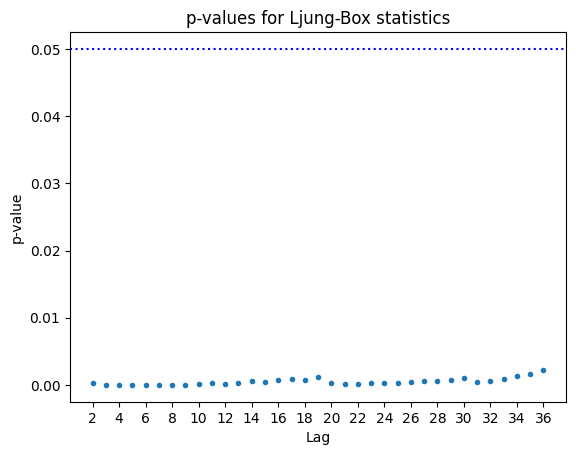

In [407]:
plot_LB_pvalue(armaresid**2, noestimatedcoef =1 , nolags=36)

In [409]:
garch = arch_model(armaresid, p=1, q=1, mean='Zero').fit()
garch.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 1699.7869975542826
Iteration:      2,   Func. Count:     11,   Neg. LLF: 810.7475772904108
Iteration:      3,   Func. Count:     16,   Neg. LLF: 799.4346280462196
Iteration:      4,   Func. Count:     21,   Neg. LLF: 799.4207636083771
Iteration:      5,   Func. Count:     25,   Neg. LLF: 799.413234493066
Iteration:      6,   Func. Count:     29,   Neg. LLF: 799.3913789303825
Iteration:      7,   Func. Count:     33,   Neg. LLF: 799.3304894817186
Iteration:      8,   Func. Count:     37,   Neg. LLF: 809.4227547055998
Iteration:      9,   Func. Count:     42,   Neg. LLF: 809.8141385767367
Iteration:     10,   Func. Count:     47,   Neg. LLF: 810.4916734561544
Iteration:     11,   Func. Count:     52,   Neg. LLF: 811.999754409334
Iteration:     12,   Func. Count:     57,   Neg. LLF: 799.7167049079135
Iteration:     13,   Func. Count:     62,   Neg. LLF: 799.1036313735431
Iteration:     14,   Func. Count:     66,   Neg. LLF: 799.7466917

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.004
Vol Model:                      GARCH   Log-Likelihood:               -798.690
Distribution:                  Normal   AIC:                           1603.38
Method:            Maximum Likelihood   BIC:                           1613.82
                                        No. Observations:                  240
Date:                Sun, Aug 04 2024   Df Residuals:                      240
Time:                        19:35:38   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.8072      0.842      0.959      0.337      [ -0.842,  2.457]
alpha[1]       0.0000  3.141e-02      0.000      1.000 [-6.155e-02,6.155e-02]
beta[1]        0.9756  4.808e-02     20.291  1.538e-91      [  0.881,  1.070]
=============================================================================

Covariance estimator: robust
"""

In [414]:
egarch = arch_model(armaresid, p=0, o=1, q=1, mean='Zero', vol='EGARCH').fit()
egarch.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 47721725.69002585
Iteration:      2,   Func. Count:     13,   Neg. LLF: 47748270.367681675
Iteration:      3,   Func. Count:     21,   Neg. LLF: 1006607.6067080585
Iteration:      4,   Func. Count:     29,   Neg. LLF: 792.6920806960762
Iteration:      5,   Func. Count:     33,   Neg. LLF: 792.6655446473105
Iteration:      6,   Func. Count:     37,   Neg. LLF: 792.663511715785
Iteration:      7,   Func. Count:     41,   Neg. LLF: 792.6629424803575
Iteration:      8,   Func. Count:     45,   Neg. LLF: 792.662901698502
Iteration:      9,   Func. Count:     49,   Neg. LLF: 792.6629011626085
Optimization terminated successfully    (Exit mode 0)
            Current function value: 792.6629011626085
            Iterations: 9
            Function evaluations: 49
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - EGARCH Model Results                       
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.004
Vol Model:                     EGARCH   Log-Likelihood:               -792.663
Distribution:                  Normal   AIC:                           1591.33
Method:            Maximum Likelihood   BIC:                           1601.77
                                        No. Observations:                  240
Date:                Sun, Aug 04 2024   Df Residuals:                      240
Time:                        19:37:12   Df Model:                            0
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1072  6.157e-02      1.741  8.165e-02 [-1.347e-02,  0.228]
gamma[1]      -0.0901  3.596e-02     -2.506  1.222e-02 [ -0.161,-1.963e-02]
beta[1]        0.9716  1.588e-02     61.182      0.000    [  0.940,  1.003]
===========================================================================

Covariance estimator: robust
"""

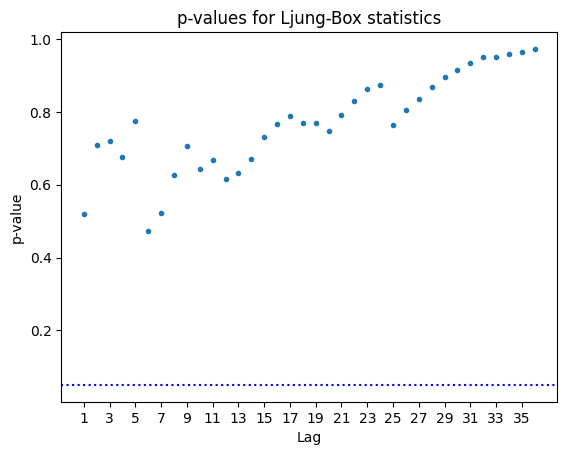

In [420]:
plot_LB_pvalue(egarch.std_resid, noestimatedcoef = 0, nolags=36)

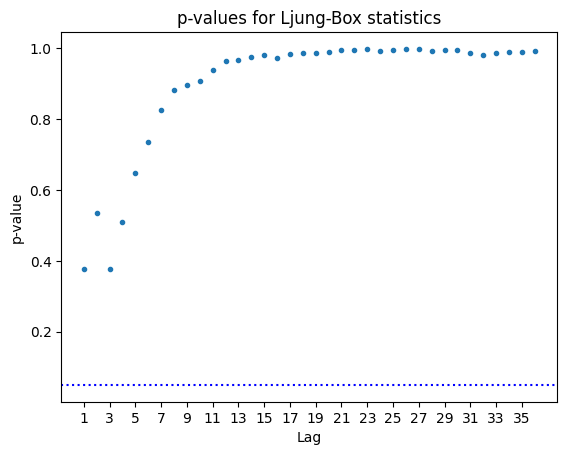

In [422]:
plot_LB_pvalue(egarch.std_resid**2, noestimatedcoef = 0, nolags=36)

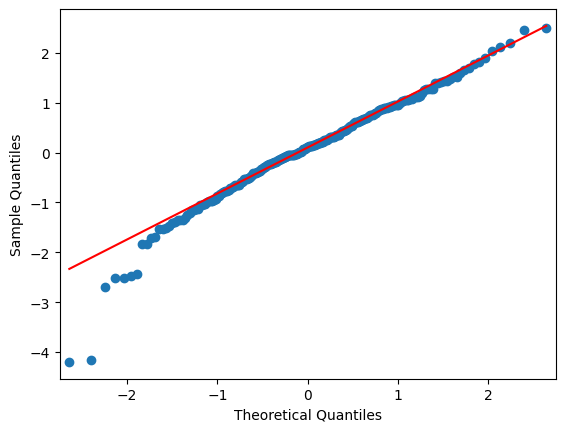

In [425]:
qqplot(egarch.std_resid,line='q')
plt.show()

In [432]:
egarcht = arch_model(armaresid, p=0, o=1, q=1, mean='Zero', vol='EGARCH',dist = 't').fit()
egarcht.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5471.391590566846
Iteration:      2,   Func. Count:     15,   Neg. LLF: 4705.155141410025
Iteration:      3,   Func. Count:     25,   Neg. LLF: 1256.0852967742442
Iteration:      4,   Func. Count:     34,   Neg. LLF: 786.9719920901463
Iteration:      5,   Func. Count:     39,   Neg. LLF: 786.9557640359484
Iteration:      6,   Func. Count:     44,   Neg. LLF: 786.953253086088
Iteration:      7,   Func. Count:     49,   Neg. LLF: 786.9530305959637
Iteration:      8,   Func. Count:     54,   Neg. LLF: 786.953021837576
Iteration:      9,   Func. Count:     59,   Neg. LLF: 786.9530206368228
Iteration:     10,   Func. Count:     63,   Neg. LLF: 786.9530206368279
Optimization terminated successfully    (Exit mode 0)
            Current function value: 786.9530206368228
            Iterations: 10
            Function evaluations: 63
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Zero Mean - EGARCH Model Results                          
====================================================================================
Dep. Variable:                         None   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.004
Vol Model:                           EGARCH   Log-Likelihood:               -786.953
Distribution:      Standardized Student's t   AIC:                           1581.91
Method:                  Maximum Likelihood   BIC:                           1595.83
                                              No. Observations:                  240
Date:                      Sun, Aug 04 2024   Df Residuals:                      240
Time:                              19:44:25   Df Model:                            0
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0949  4.253e-02      2.232  2.562e-02  [1.157e-02,  0.178]
gamma[1]      -0.0721  3.139e-02     -2.296  2.169e-02 [ -0.134,-1.054e-02]
beta[1]        0.9743  1.099e-02     88.656      0.000    [  0.953,  0.996]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             7.1687      2.709      2.646  8.149e-03 [  1.858, 12.479]
========================================================================

Covariance estimator: robust
"""

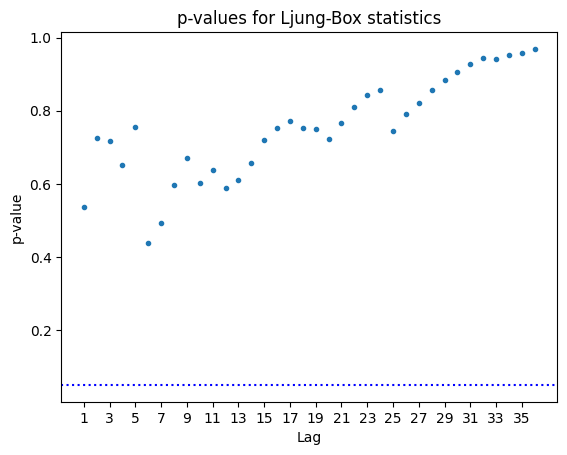

In [433]:
plot_LB_pvalue(egarcht.std_resid, noestimatedcoef = 0, nolags=36)

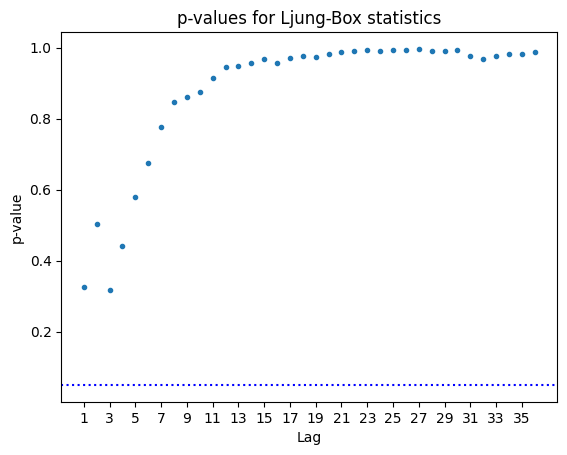

In [434]:
plot_LB_pvalue(egarcht.std_resid**2, noestimatedcoef = 0, nolags=36)

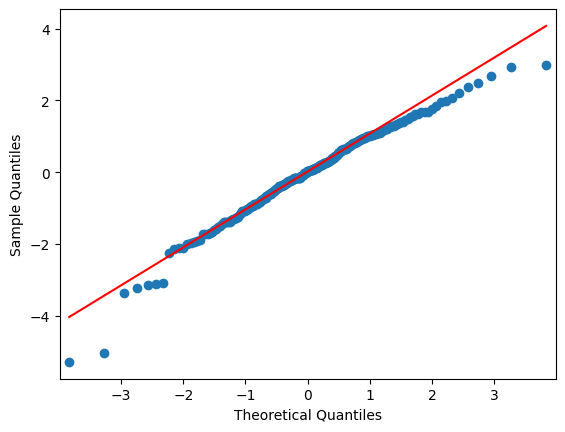

In [435]:
qqplot(egarcht.std_resid, stats.t, line = 'q', distargs = (7.16,) ,fit = True)
plt.show()

In [449]:
zgarcht = arch_model(armaresid, p=0, o=1, q=1, mean='Zero',dist = 't').fit()
zgarcht.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1060.7966652612706
Iteration:      2,   Func. Count:     13,   Neg. LLF: 798.6914436116796
Iteration:      3,   Func. Count:     19,   Neg. LLF: 787.7550862301979
Iteration:      4,   Func. Count:     24,   Neg. LLF: 787.7544434750582
Iteration:      5,   Func. Count:     29,   Neg. LLF: 787.7541616390041
Iteration:      6,   Func. Count:     34,   Neg. LLF: 787.7540043768865
Iteration:      7,   Func. Count:     39,   Neg. LLF: 787.7539919907072
Iteration:      8,   Func. Count:     44,   Neg. LLF: 787.7539883433614
Iteration:      9,   Func. Count:     49,   Neg. LLF: 787.7539836121919
Iteration:     10,   Func. Count:     54,   Neg. LLF: 787.7539797368831
Iteration:     11,   Func. Count:     59,   Neg. LLF: 787.7539786011814
Iteration:     12,   Func. Count:     63,   Neg. LLF: 787.7539786011831
Optimization terminated successfully    (Exit mode 0)
            Current function value: 787.7539786011814
            Iterations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Zero Mean - GJR-GARCH Model Results                         
====================================================================================
Dep. Variable:                         None   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.004
Vol Model:                        GJR-GARCH   Log-Likelihood:               -787.754
Distribution:      Standardized Student's t   AIC:                           1583.51
Method:                  Maximum Likelihood   BIC:                           1597.43
                                              No. Observations:                  240
Date:                      Sun, Aug 04 2024   Df Residuals:                      240
Time:                              19:49:25   Df Model:                            0
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          5.0571      4.807      1.052      0.293 [ -4.365, 14.479]
gamma[1]       0.1722      0.152      1.135      0.257 [ -0.125,  0.470]
beta[1]        0.8021      0.153      5.243  1.582e-07 [  0.502,  1.102]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             6.0003      2.049      2.929  3.405e-03 [  1.985, 10.016]
========================================================================

Covariance estimator: robust
"""

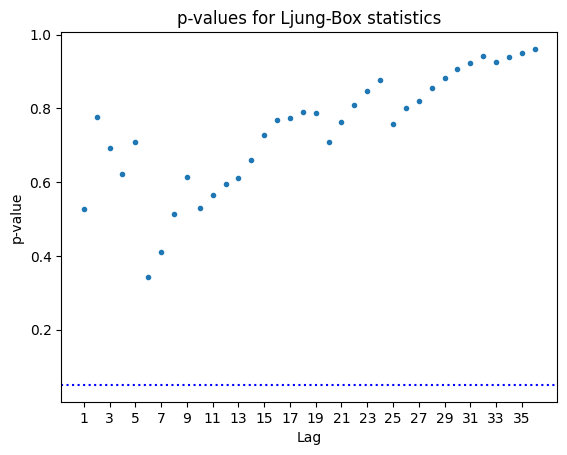

In [450]:
plot_LB_pvalue(zgarcht.std_resid, noestimatedcoef = 0, nolags=36)

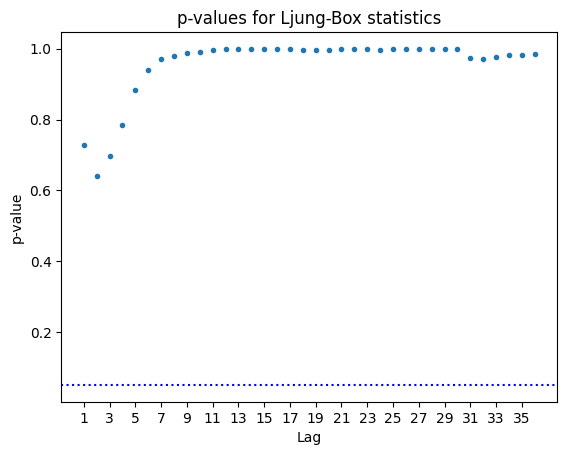

In [451]:
plot_LB_pvalue(zgarcht.std_resid**2, noestimatedcoef = 0, nolags=36)

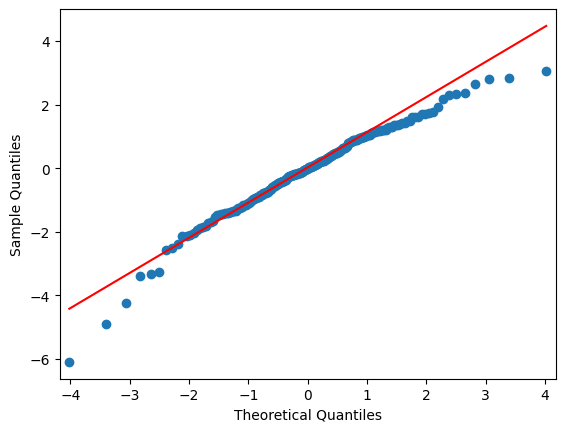

In [452]:
qqplot(zgarcht.std_resid, stats.t, line = 'q', distargs = (6,) ,fit = True)
plt.show()